In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Forcing outputs in jupyter notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [33]:
# Extracting scraped data
spotify_data = pd.read_csv('../spotify-datasets/final_spotify_data.csv', delimiter=',')
spotify_data = spotify_data.drop(['Unnamed: 0'], axis=1)
spotify_data.head()
len(spotify_data['track_id'])

,track_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,...,total_available_markets,release_date,topartist_id,topartist_name,artist_names,key,mode,time_signature,artist_genre,artist_genre_list
0,7lPN2DXiMsVn7XUKtOW1CS,drivers license,100,0.72100,0.585,242014.0,0.436,0.000013,0.1050,-8.761,...,1.0,2021-01-08,1McMsnEElThX1knmY4oliG,Olivia Rodrigo,Olivia Rodrigo;,10.0,1.0,4.0,pop,pop;
1,5QO79kh1waicV47BqGRL3g,Save Your Tears,96,0.02120,0.680,215627.0,0.826,0.000012,0.5430,-5.487,...,184.0,2020-03-20,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,The Weeknd;,0.0,1.0,4.0,canadian contemporary r&b,canadian contemporary r&b;canadian pop;pop;
2,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,0.00146,0.514,200040.0,0.730,0.000095,0.0897,-5.934,...,184.0,2020-03-20,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,The Weeknd;,1.0,1.0,4.0,canadian contemporary r&b,canadian contemporary r&b;canadian pop;pop;
3,3tjFYV6RSFtuktYl3ZtYcq,Mood (feat. iann dior),95,0.22100,0.700,140526.0,0.722,0.000000,0.2720,-3.558,...,0.0,2020-07-24,6fWVd57NKTalqvmjRd2t8Z,24kGoldn,24kGoldn;iann dior;,7.0,0.0,4.0,cali rap,cali rap;pop;pop rap;rap;
4,27OeeYzk6klgBh83TSvGMA,WITHOUT YOU,94,0.21300,0.662,161385.0,0.413,0.000000,0.1340,-7.357,...,0.0,2020-11-06,2tIP7SsRs7vjIcLrU85W8J,The Kid LAROI,The Kid LAROI;,0.0,1.0,4.0,australian hip hop,australian hip hop;pop;


676681

In [27]:
# feature names
spotify_data.columns

Index(['track_id', 'track_name', 'popularity', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'total_available_markets',
       'release_date', 'topartist_id', 'topartist_name', 'artist_names', 'key',
       'mode', 'time_signature', 'artist_genre', 'artist_genre_list'],
      dtype='object')

In [20]:
# number of unique artists
print("Number of unique artists: ", len(spotify_data['topartist_name'].unique()))

# average popularity score of each artist
avg_artist_popularity = spotify_data.groupby('topartist_name', as_index=False)['popularity'].mean()
avg_artist_popularity = avg_artist_popularity.sort_values(by=['popularity'],ascending=False, na_position='last')
# Top 5 Artists by popularity
avg_artist_popularity.head()
# Bottom 5 Artists by popularity
avg_artist_popularity.tail()


# number of hits per artist??

Number of unique artists:  139300


,topartist_name,popularity
15444,Boza,92.0
71734,Luar La L,91.0
12033,Beach Weather,90.0
46585,HVME,88.0
80290,Milly,88.0


,topartist_name,popularity
80800,"Mister Butta, Ayesha Sharma",0.0
80802,Mister Cyclops,0.0
80807,Mister Dizzy,0.0
80808,Mister Farra,0.0
139298,ｌｏｎｇ ｂｏｙ,0.0


,topartist_name,total_available_markets
139298,ｌｏｎｇ ｂｏｙ,185.0
101605,Rousseau,185.0
39044,Fg Kutthroat,185.0
39045,Fg's Romance,185.0
39047,Fgm Boe,185.0


,topartist_name,total_available_markets
36221,Eric Hvell,0.0
104332,Sandal Weather,0.0
104327,Sancto Ianne,0.0
36229,Eric Lamb,0.0
0,!!!,0.0


(array([25851.,   800.,  1062.,  1329.,  1984.,  2561.,  2304.,  2459.,
         2868., 98081.]),
 array([  0. ,  18.5,  37. ,  55.5,  74. ,  92.5, 111. , 129.5, 148. ,
        166.5, 185. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'Popularity Score')

Text(0, 0.5, 'Number of Artists')

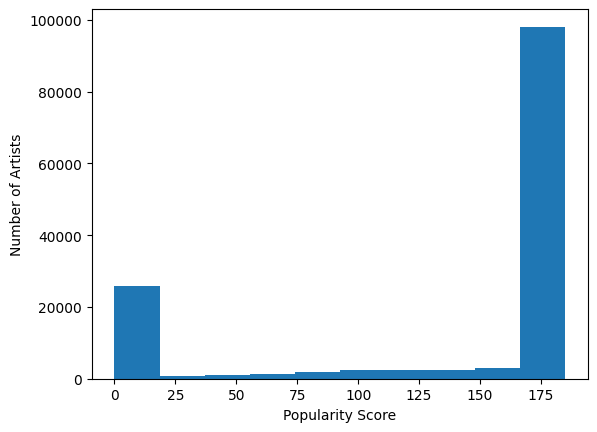

In [42]:
# average market availability of each artist (global presence)
avg_artist_market = spotify_data.groupby('topartist_name', as_index=False)['total_available_markets'].mean()
avg_artist_market = avg_artist_market.sort_values(by=['total_available_markets'],ascending=False, na_position='last')
# Top 5 Artists by market availabiity
avg_artist_market.head()
# Bottom 5 Artists by market availabiity
avg_artist_market.tail()

plt.hist(avg_artist_market['total_available_markets'], bins=10)
plt.xlabel('Popularity Score')
plt.ylabel('Number of Artists')

Number of unique genres:  5067


,artist_genre,popularity
2367,indonesian lo-fi pop,72.5
322,bahamian pop,65.0
5023,worship,65.0
4314,sinhala indie,64.5
4607,taiwan indie,63.5


,artist_genre,popularity
3399,new jersey punk,0.0
1524,dutch experimental,0.0
3395,new jack smooth,0.0
4352,slovenian indie,0.0
4544,swedish power metal,0.0


(array([6.480e+02, 8.150e+02, 1.021e+03, 9.840e+02, 8.220e+02, 4.870e+02,
        2.160e+02, 5.600e+01, 1.600e+01, 1.000e+00]),
 array([ 0.  ,  7.25, 14.5 , 21.75, 29.  , 36.25, 43.5 , 50.75, 58.  ,
        65.25, 72.5 ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'Popularity Score')

Text(0, 0.5, 'Number of Genres')

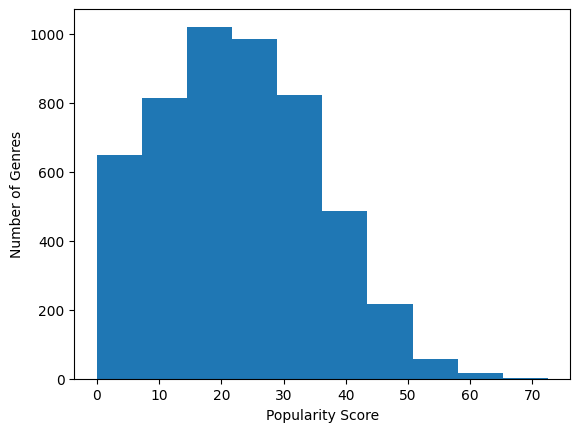

In [43]:
# number of genres
print("Number of unique genres: ", len(spotify_data['artist_genre'].unique()))

# average popularity of each genre (maybe according to release date as well?)
avg_genre_popularity = spotify_data.groupby('artist_genre', as_index=False)['popularity'].mean()
avg_genre_popularity = avg_genre_popularity.sort_values(by=['popularity'],ascending=False, na_position='last')
# Top 5 Genres 
avg_genre_popularity.head()
# Bottom 5 Genres 
avg_genre_popularity.tail()

plt.hist(avg_genre_popularity['popularity'], bins=10)
plt.xlabel('Popularity Score')
plt.ylabel('Number of Genres')

In [46]:
# number of releases per artist
num_releases_per_artist = spotify_data['topartist_name'].value_counts()
num_releases_per_artist.head()
num_releases_per_artist.tail()

Johann Sebastian Bach      2002
Wolfgang Amadeus Mozart    1716
Die drei ???               1464
Giuseppe Verdi             1459
Ludwig van Beethoven       1327
Name: topartist_name, dtype: int64

Lil Beep                    1
M VZN                       1
Ice IX                      1
Tre Da Kid                  1
Jr Thomas & The Volcanos    1
Name: topartist_name, dtype: int64

In [35]:
spotify_data['tempo'].head()

0    143.874
1    118.051
2    171.005
3     90.989
4     93.005
Name: tempo, dtype: float64

In [32]:
# Mean value of features containing continuous data
continuous_variables = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness','speechiness', 'tempo', 'valence']

print("Average values of continuous numeric data:")
spotify_data[continuous_variables].mean(axis=0)

Average values of continuous numeric data:


acousticness          0.352293
danceability          0.591749
energy                0.582816
instrumentalness      0.184506
liveness              0.214905
loudness             -9.876315
speechiness           0.165155
tempo               119.047956
valence               0.469378
dtype: float64

Text(0.5, 0.98, 'Density Plots for Continuous Variables')

<AxesSubplot: >

<AxesSubplot: ylabel='Density'>

Text(0.5, 1.0, 'acousticness')

<AxesSubplot: >

<AxesSubplot: ylabel='Density'>

Text(0.5, 1.0, 'danceability')

<AxesSubplot: >

<AxesSubplot: ylabel='Density'>

Text(0.5, 1.0, 'energy')

<AxesSubplot: >

<AxesSubplot: ylabel='Density'>

Text(0.5, 1.0, 'instrumentalness')

<AxesSubplot: >

<AxesSubplot: ylabel='Density'>

Text(0.5, 1.0, 'liveness')

<AxesSubplot: >

<AxesSubplot: ylabel='Density'>

Text(0.5, 1.0, 'loudness')

<AxesSubplot: >

<AxesSubplot: ylabel='Density'>

Text(0.5, 1.0, 'speechiness')

<AxesSubplot: >

<AxesSubplot: ylabel='Density'>

Text(0.5, 1.0, 'tempo')

<AxesSubplot: >

<AxesSubplot: ylabel='Density'>

Text(0.5, 1.0, 'valence')

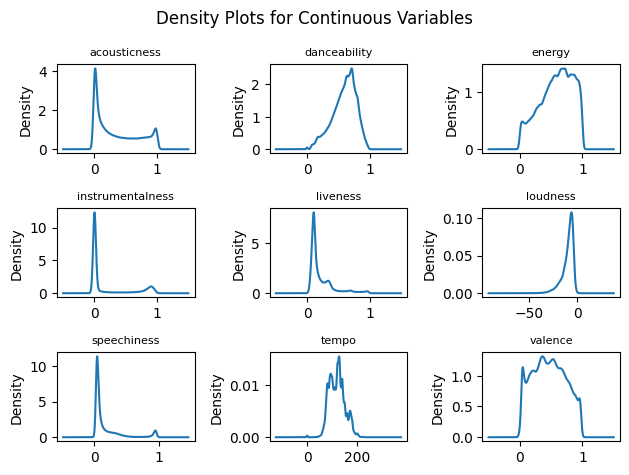

In [36]:
plt.suptitle('Density Plots for Continuous Variables')

for i,cont_feat in enumerate(continuous_variables):
    plt.tight_layout()
    plt.subplot(3, 3, i+1)
    spotify_data[cont_feat].plot(kind='density')
    plt.title(cont_feat,fontsize=8)

<Figure size 1000x1000 with 0 Axes>

Text(0.5, 0.98, 'Box Plots for Continuous Variables')

<AxesSubplot: >

{'whiskers': [<matplotlib.lines.Line2D at 0x15720ea60>,
 'caps': [<matplotlib.lines.Line2D at 0x15720efa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15720e7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x157145520>],
 'fliers': [<matplotlib.lines.Line2D at 0x15721d340>],
 'means': []}

Text(0.5, 1.0, 'acousticness')

<AxesSubplot: >

{'whiskers': [<matplotlib.lines.Line2D at 0x157269b80>,
 'caps': [<matplotlib.lines.Line2D at 0x15727b100>,
 'boxes': [<matplotlib.lines.Line2D at 0x1572698e0>],
 'medians': [<matplotlib.lines.Line2D at 0x15727b640>],
 'fliers': [<matplotlib.lines.Line2D at 0x15727b8e0>],
 'means': []}

Text(0.5, 1.0, 'danceability')

<AxesSubplot: >

{'whiskers': [<matplotlib.lines.Line2D at 0x1572c7cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1572da250>,
 'boxes': [<matplotlib.lines.Line2D at 0x1572c7a30>],
 'medians': [<matplotlib.lines.Line2D at 0x1572da790>],
 'fliers': [<matplotlib.lines.Line2D at 0x1572daa30>],
 'means': []}

Text(0.5, 1.0, 'energy')

<AxesSubplot: >

{'whiskers': [<matplotlib.lines.Line2D at 0x157328d00>,
 'caps': [<matplotlib.lines.Line2D at 0x15733b280>,
 'boxes': [<matplotlib.lines.Line2D at 0x157328a60>],
 'medians': [<matplotlib.lines.Line2D at 0x15733b7c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x15733ba60>],
 'means': []}

Text(0.5, 1.0, 'instrumentalness')

<AxesSubplot: >

{'whiskers': [<matplotlib.lines.Line2D at 0x157388f70>,
 'caps': [<matplotlib.lines.Line2D at 0x15739a4f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x157388cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x15739aa30>],
 'fliers': [<matplotlib.lines.Line2D at 0x15739acd0>],
 'means': []}

Text(0.5, 1.0, 'liveness')

<AxesSubplot: >

{'whiskers': [<matplotlib.lines.Line2D at 0x1573e9fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x1573fa550>,
 'boxes': [<matplotlib.lines.Line2D at 0x1573e9d00>],
 'medians': [<matplotlib.lines.Line2D at 0x1573faa90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1573fad30>],
 'means': []}

Text(0.5, 1.0, 'loudness')

<AxesSubplot: >

{'whiskers': [<matplotlib.lines.Line2D at 0x17813be20>,
 'caps': [<matplotlib.lines.Line2D at 0x17814e3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17813bb80>],
 'medians': [<matplotlib.lines.Line2D at 0x17814e8e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17814eb80>],
 'means': []}

Text(0.5, 1.0, 'speechiness')

<AxesSubplot: >

{'whiskers': [<matplotlib.lines.Line2D at 0x1781ac2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1781ac7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17819afd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1781acd30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1781acfd0>],
 'means': []}

Text(0.5, 1.0, 'tempo')

<AxesSubplot: >

{'whiskers': [<matplotlib.lines.Line2D at 0x1781faf70>,
 'caps': [<matplotlib.lines.Line2D at 0x17820e4f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1781facd0>],
 'medians': [<matplotlib.lines.Line2D at 0x17820ea30>],
 'fliers': [<matplotlib.lines.Line2D at 0x17820ecd0>],
 'means': []}

Text(0.5, 1.0, 'valence')

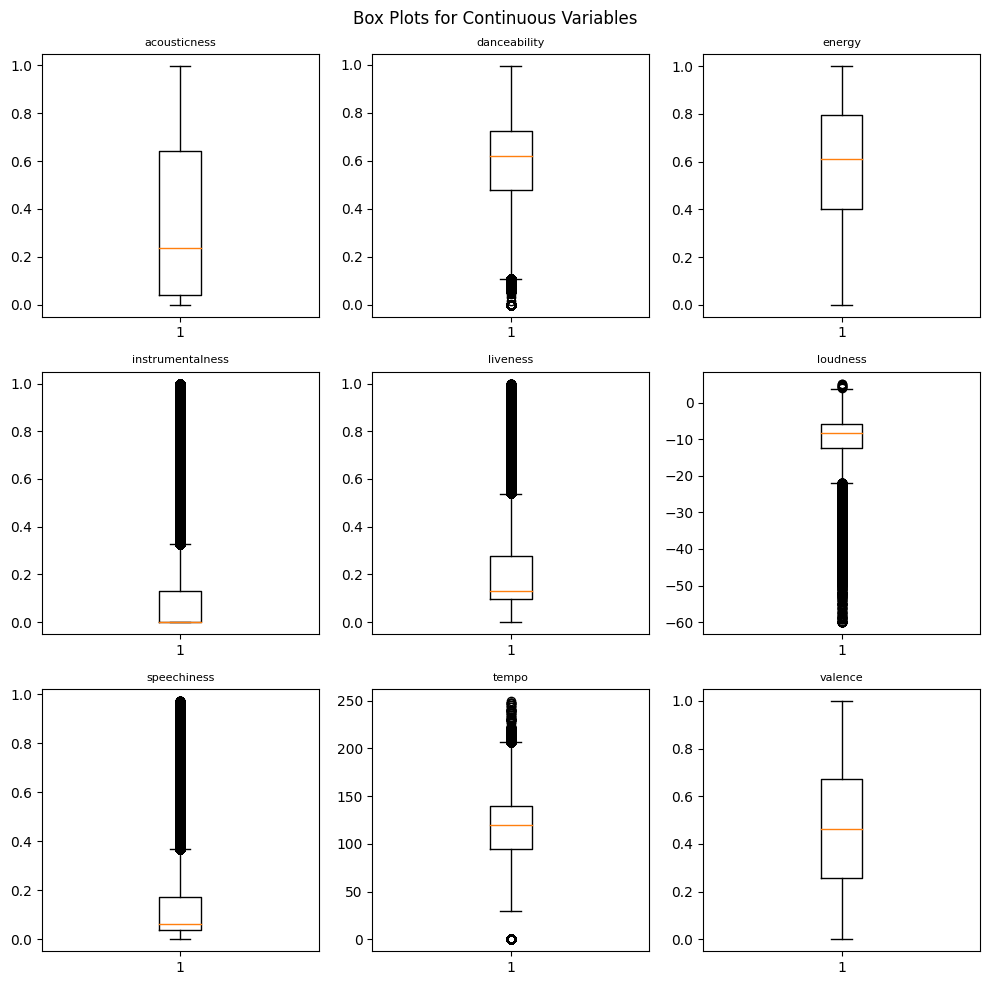

In [38]:
plt.figure(figsize=(10, 10))
plt.suptitle('Box Plots for Continuous Variables')

for i,cont_feat in enumerate(continuous_variables):
    plt.tight_layout()
    plt.subplot(3, 3, i+1)
    plt.boxplot(spotify_data[cont_feat])
    plt.title(cont_feat,fontsize=8)

In [39]:
num_spotify_data = spotify_data.select_dtypes(include=np.number)
num_spotify_data.columns

cat_spotify_data = spotify_data.select_dtypes(include=['object'])
cat_spotify_data.columns

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'total_available_markets', 'key', 'mode', 'time_signature'],
      dtype='object')

Index(['track_id', 'track_name', 'release_date', 'topartist_id',
       'topartist_name', 'artist_names', 'artist_genre', 'artist_genre_list'],
      dtype='object')

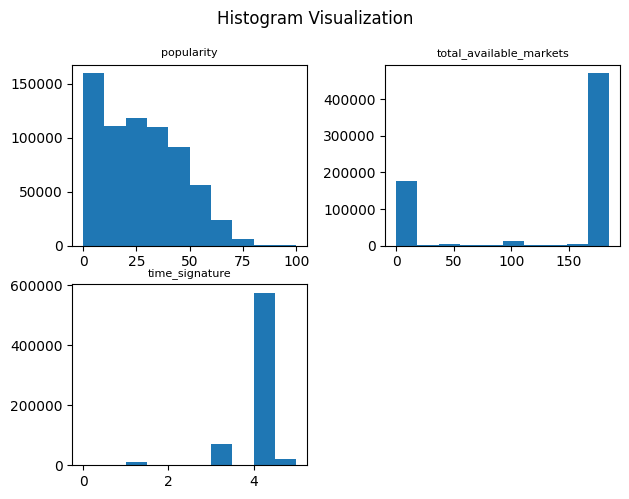

In [31]:
# Histogram Analysis
histogram_features = ['popularity','total_available_markets','time_signature',]

num = 0
for hist_feat in histogram_features:
    num+=1
    plt.suptitle('Histogram Visualization')
    plt.tight_layout()
    plt.subplot(2,2, num)
    plt.hist(spotify_data[hist_feat], bins=10)
    plt.title(hist_feat,fontsize=8)